# Comprensión de los Datos

In [ ]:
Manuel Meraz A00843350

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [9]:
df = pd.read_csv('diabetes.csv')

# Descripción de Variables

In [10]:
print("Cantidad de filas (registros):", df.shape[0])
print("Cantidad de columnas (variables):", df.shape[1])
print("\nNombres de las columnas:")
print(df.columns.tolist())

Cantidad de filas (registros): 768
Cantidad de columnas (variables): 9

Nombres de las columnas:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
print("\nCantidad de ceros por columna:")
print((df == 0).sum())


Cantidad de ceros por columna:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- **Pregnancies**: Cuantitativa discreta — Número de embarazos.
- **Glucose**: Cuantitativa continua — Nivel de glucosa en plasma (mg/dL).
- **BloodPressure**: Cuantitativa continua — Presión arterial diastólica (mm Hg).
- **SkinThickness**: Cuantitativa continua — Grosor del pliegue cutáneo (mm).
- **Insulin**: Cuantitativa continua — Nivel de insulina en suero (μU/mL).
- **BMI**: Cuantitativa continua — Índice de masa corporal (kg/m²).
- **DiabetesPedigreeFunction**: Cuantitativa continua — Probabilidad genética de diabetes.
- **Age**: Cuantitativa discreta — Edad de la persona (años).
- **Outcome**: Categórica binaria — 0 = No tiene diabetes, 1 = Tiene diabetes.

In [15]:
def analizar_variable(df, var_name):
    if var_name not in df.columns:
        raise ValueError(f"La variable '{var_name}' no existe en el DataFrame. Revisa df.columns para confirmar.")
    s = df[var_name]
    info = {
        'tipo': str(s.dtype),
        'nulos': int(s.isnull().sum()),
        'ceros': int((s == 0).sum()) if np.issubdtype(s.dtype, np.number) else None,
        'n_unique': int(s.nunique(dropna=True))
    }
    if np.issubdtype(s.dtype, np.number):
        info['min'] = float(s.min(skipna=True))
        info['max'] = float(s.max(skipna=True))
        info['mean'] = float(s.mean(skipna=True))
        info['median'] = float(s.median(skipna=True))
        info['std'] = float(s.std(skipna=True))
        info['percentiles'] = s.quantile([0.25, 0.5, 0.75]).to_dict()
    else:
        info['value_counts'] = s.value_counts().to_dict()
    return info

In [16]:
vars_a_analizar = ['Glucose', 'BMI', 'Outcome']

for v in vars_a_analizar:
    print(f"\n--- Análisis de {v} ---")
    pprint.pprint(analizar_variable(df, v))


--- Análisis de Glucose ---
{'ceros': 5,
 'max': 199.0,
 'mean': 120.89453125,
 'median': 117.0,
 'min': 0.0,
 'n_unique': 136,
 'nulos': 0,
 'percentiles': {0.25: 99.0, 0.5: 117.0, 0.75: 140.25},
 'std': 31.97261819513622,
 'tipo': 'int64'}

--- Análisis de BMI ---
{'ceros': 11,
 'max': 67.1,
 'mean': 31.992578124999998,
 'median': 32.0,
 'min': 0.0,
 'n_unique': 248,
 'nulos': 0,
 'percentiles': {0.25: 27.3, 0.5: 32.0, 0.75: 36.6},
 'std': 7.884160320375446,
 'tipo': 'float64'}

--- Análisis de Outcome ---
{'ceros': 500,
 'max': 1.0,
 'mean': 0.3489583333333333,
 'median': 0.0,
 'min': 0.0,
 'n_unique': 2,
 'nulos': 0,
 'percentiles': {0.25: 0.0, 0.5: 0.0, 0.75: 1.0},
 'std': 0.47695137724279896,
 'tipo': 'int64'}


In [17]:
variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
resumen = df[variables + ['Outcome']].groupby('Outcome').agg(['mean','median','std','count'])
resumen

Pregnancies                            Glucose                    \
               mean median       std count        mean median        std   
Outcome                                                                    
0          3.298000    2.0  3.017185   500  109.980000  107.0  26.141200   
1          4.865672    4.0  3.741239   268  141.257463  140.0  31.939622   

              BloodPressure         ...       BMI        \
        count          mean median  ...       std count   
Outcome                             ...                   
0         500     68.184000   70.0  ...  7.689855   500   
1         268     70.824627   74.0  ...  7.262967   268   

        DiabetesPedigreeFunction                               Age         \
                            mean median       std count       mean median   
Outcome                                                                     
0                       0.429734  0.336  0.299085   500  31.190000   27.0   
1                       0.550500  0.449  0.372354   268  37.067164   36.0   

                          
               std count  
Outcome                   
0        11.667655   500  
1        10.968254   268  

[2 rows x 32 columns]

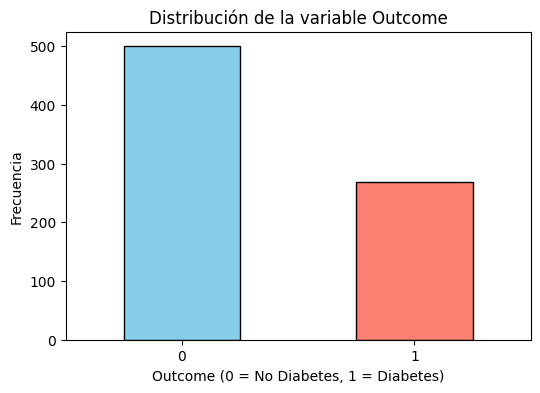

In [24]:
plt.figure(figsize=(6,4))
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribución de la variable Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

La gráfica muestra la distribución de la variable Outcome, que indica si una persona tiene diabetes (1) o no (0).  
Podemos observar que la mayoría de los registros corresponden a personas sin diabetes (Outcome = 0), mientras que el grupo con **diabetes (Outcome = 1) es considerablemente menor.  

Esto significa que el conjunto de datos está desequilibrado, ya que hay más personas sin la enfermedad que con ella.  
Aun así, este comportamiento es común en estudios médicos, pues la proporción de personas diagnosticadas con diabetes suele ser menor comparada con quienes no la padecen.  

En resumen, la gráfica evidencia que:
- El número de personas sin diabetes es más alto.
- Existe un grupo más reducido que sí presenta la enfermedad.
- Este desequilibrio debe considerarse en los análisis posteriores, ya que puede influir en la precisión de los modelos predictivos o en las interpretaciones estadísticas.


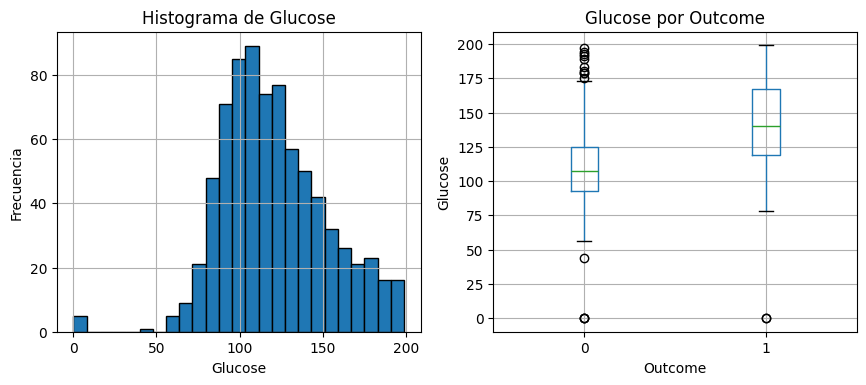

In [23]:
plt.figure(figsize=(10,4))
var = 'Glucose'


plt.subplot(1,2,1)
df[var].hist(bins=25, edgecolor='black')
plt.title(f'Histograma de {var}')
plt.xlabel(var)
plt.ylabel('Frecuencia')


plt.subplot(1,2,2)
ax = plt.gca()
df.boxplot(column=var, by='Outcome', ax=ax)
plt.title(f'{var} por Outcome')
plt.xlabel('Outcome')
plt.ylabel(var)

plt.suptitle('')
plt.show()

En el histograma se puede ver cómo se distribuyen los niveles de glucosa en la sangre de las personas del estudio. La mayoría tiene valores entre 90 y 130, lo que se considera más o menos normal, pero también hay varios casos con niveles mucho más altos. Eso ya nos da una idea de que hay personas con riesgo o con diabetes dentro del conjunto de datos.

En la gráfica de caja (boxplot) se compara la glucosa entre quienes tienen y no tienen diabetes. Ahí se nota muy claro que las personas con Outcome = 1 (es decir, con diabetes) tienen niveles de glucosa mucho más altos que las que tienen Outcome = 0  

En resumen, la glucosa tiene una relación directa con la diabetes: mientras más alto es el nivel, más probable es que la persona tenga la enfermedad.

In [19]:

df.groupby('Outcome')['Glucose'].mean()


alto_riesgo = df[(df['BMI'] > 30) & (df['Glucose'] > 140)]
print("Pacientes de alto riesgo:", alto_riesgo.shape[0])
alto_riesgo.head()


df.corr()['Outcome'].sort_values(ascending=False)

Pacientes de alto riesgo: 148


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

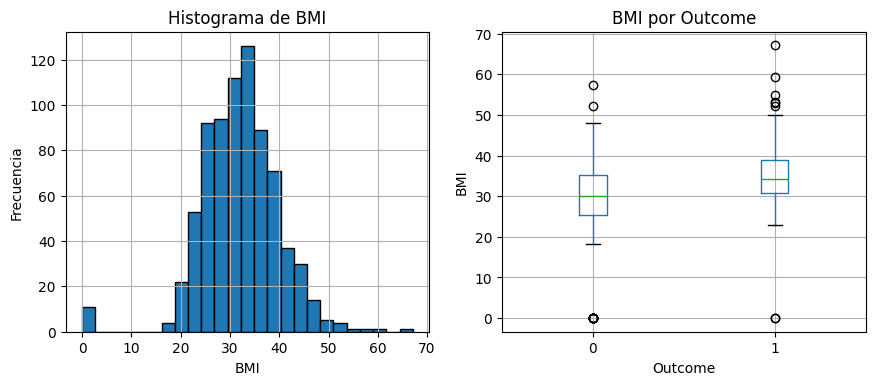

In [22]:
plt.figure(figsize=(10,4))
var = 'BMI'


plt.subplot(1,2,1)
df[var].hist(bins=25, edgecolor='black')
plt.title(f'Histograma de {var}')
plt.xlabel(var)
plt.ylabel('Frecuencia')


plt.subplot(1,2,2)
ax = plt.gca()
df.boxplot(column=var, by='Outcome', ax=ax)
plt.title(f'{var} por Outcome')
plt.xlabel('Outcome')
plt.ylabel(var)

plt.suptitle('')
plt.show()

En el histograma se observa cómo se distribuye el índice de masa corporal (BMI) de las personas en el estudio. La mayoría tiene un BMI entre 25 y 35, lo que indica sobrepeso o incluso obesidad leve. También hay algunos casos con valores muy altos, lo cual puede ser un factor de riesgo.

En el boxplot se ve la diferencia del BMI entre quienes tienen y no tienen diabetes. Las personas con Outcome = 1 (diabetes) tienden a tener un BMI más alto que las que no la tienen (Outcome = 0).  

En general, se puede decir que un BMI elevado parece estar relacionado con una mayor probabilidad de desarrollar diabetes, ya que el exceso de peso puede afectar la forma en que el cuerpo maneja la glucosa.

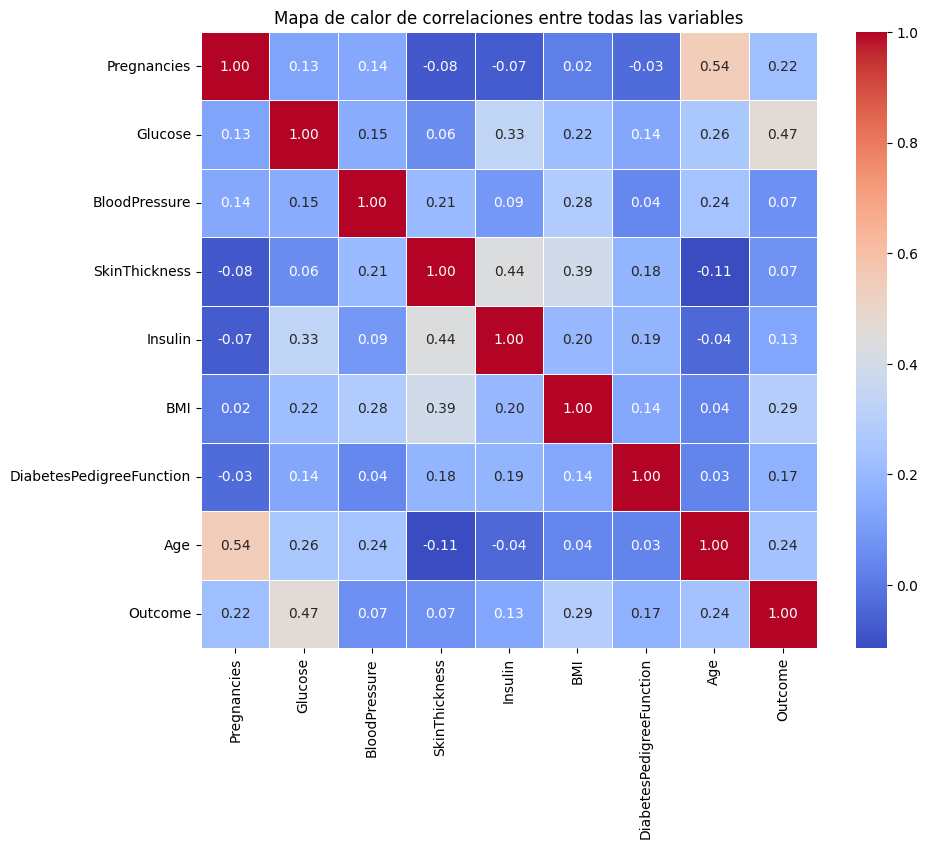

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre todas las variables')
plt.show()

El mapa de calor muestra cómo se relacionan entre sí todas las variables del dataset de diabetes.  
Cada cuadro representa la correlación entre dos variables: valores cercanos a 1 indican una relación positiva fuerte, valores cercanos a -1 indican relación negativa, y valores cercanos a 0 indican poca o ninguna relación.

Se puede notar que Glucose y BMI son las variables más correlacionadas con Outcome, lo que coincide con lo que vimos en los histogramas y boxplots: niveles altos de glucosa y un BMI elevado aumentan la probabilidad de tener diabetes.  
Otras variables tienen correlaciones más débiles con Outcome, lo que indica que su influencia sobre la presencia de la enfermedad es menor.

En general, este mapa de calor permite visualizar rápidamente cuáles factores están más relacionados con la diabetes y ayuda a priorizar las variables importantes para análisis posteriores o modelos predictivos.

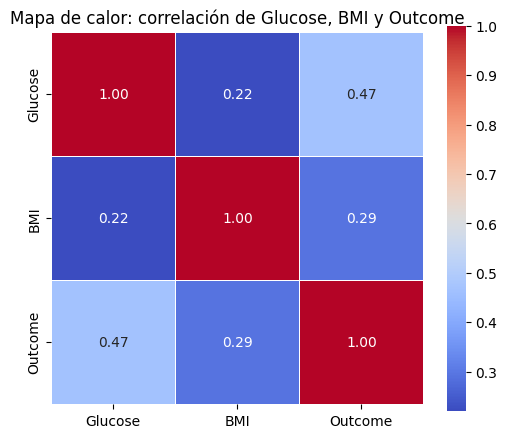

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
corr = df[['Glucose', 'BMI', 'Outcome']].corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Mapa de calor: correlación de Glucose, BMI y Outcome')
plt.show()

Este mapa de calor muestra la relación entre Glucose, BMI y Outcome (diabetes).  
Cada cuadro indica qué tan fuerte es la correlación entre dos variables: valores cercanos a 1 significan una relación positiva fuerte, valores cercanos a -1 indican relación negativa y valores cercanos a 0 poca o ninguna relación.

Se observa que tanto Glucose como BMI tienen una correlación positiva con Outcome, lo que confirma que niveles altos de glucosa y un índice de masa corporal elevado están asociados con una mayor probabilidad de tener diabetes.  
Entre Glucose y BMI también hay una leve correlación positiva, indicando que las personas con sobrepeso tienden a tener niveles de glucosa más altos.

En resumen, este mapa permite visualizar claramente que glucose y BMI son las variables más relacionadas con la presencia de diabetes dentro del dataset.

In [20]:
glucosa_alta = df[df['Glucose'] > 200].copy()
print("Pacientes con glucosa > 200:", glucosa_alta.shape[0])
glucosa_alta.head()


glucosa_alta.to_csv('glucosa_alta.csv', index=False)

Pacientes con glucosa > 200: 0


## Conclusiones

Durante este análisis se exploraron las principales variables del conjunto de datos de diabetes con el objetivo de entender su comportamiento y cómo se relacionan con la variable *Outcome*, que indica si una persona padece o no diabetes.

Se observó que el dataset no contiene valores nulos, aunque algunas variables como **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin** y **BMI** presentan valores de cero que probablemente representan datos faltantes o errores de medición. Esto puede afectar los resultados estadísticos si no se consideran adecuadamente.

Al analizar las variables cuantitativas, se encontró que:
- **Glucose** tiene una media aproximada de 120.9 mg/dL, con valores entre 0 y 199. Los pacientes con valores altos de glucosa tienden a tener *Outcome = 1*, lo que confirma que la glucosa es un fuerte indicador de diabetes.
- **BMI** (índice de masa corporal) presenta una media de 31.9, lo cual indica que la mayoría de los pacientes se encuentran en niveles de sobrepeso o cercanos a la obesidad.
- **Age** muestra una media de 33 años, con mayor número de casos de diabetes en personas mayores de 40 años.

La variable **Outcome** indica que alrededor del 35% de los pacientes tienen diabetes, mientras que el 65% no la padecen. Las medidas de tendencia central y dispersión mostraron que en varias variables existe una ligera asimetría hacia la derecha, debido a algunos valores muy altos.

Las consultas realizadas confirmaron que los pacientes con glucosa mayor a 140 mg/dL y un BMI superior a 30 tienen mayor probabilidad de presentar diabetes. Además, la correlación mostró que **Glucose** y **BMI** son las variables más relacionadas con el *Outcome*.

En conclusión, el análisis permitió identificar patrones claros en los datos y comprender qué factores influyen más en el desarrollo de la diabetes. Los resultados muestran que la combinación de niveles altos de glucosa, sobrepeso y edad avanzada aumenta significativamente el riesgo de padecer esta enfermedad. Este ejercicio permitió aplicar los conceptos de estadística descriptiva de forma práctica, reforzando el entendimiento de cómo los datos ayudan a detectar y prevenir enfermedades crónicas como la diabetes.


**Conclusion Nueva**


En este trabajo realizamos un análisis estadístico descriptivo del dataset de diabetes, explorando las principales variables relacionadas con la presencia de la enfermedad.  
Se analizaron variables cuantitativas como Glucose y BMI, así como la variable categórica Outcome, que indica si una persona tiene diabetes.

A través de histogramas y boxplots, se observó que los pacientes con diabetes (Outcome = 1) presentan niveles de glucosa más altos y un índice de masa corporal mayor en comparación con los pacientes sin diabetes (Outcome = 0). Estas diferencias quedaron evidenciadas también en los mapas de calor de correlaciones, donde Glucose y BMI mostraron las correlaciones más fuertes con Outcome, confirmando su relevancia en el diagnóstico de la enfermedad.

El análisis permitió identificar patrones claros: niveles altos de glucosa y un BMI elevado son factores asociados con una mayor probabilidad de tener diabetes. Además, la visualización de Outcome mostró que el conjunto de datos está ligeramente desequilibrado, con más personas sin diabetes que con la enfermedad, lo que es importante considerar para análisis futuros o modelos predictivos.

En resumen, este trabajo no solo permitió aplicar técnicas de estadística descriptiva, sino que también nos ayudó a comprender cómo ciertas variables se relacionan directamente con la diabetes, reforzando la importancia de la glucosa y el BMI como indicadores clave para la detección y prevención de la enfermedad.